## <font style="font-family:roboto;color:#455e6c"> Exploratory Data Analysis with Python </font>  

Exploratory data analysis (EDA) refers to the process of performing initial investigations on data. Before performing any `Machine Learning` process it is very important to understand the data and EDA helps us to:
- Discover patterns in the data
- Spot anomalies in the data
- Test hypothesis
- Check assumptions with the help of summary statistics and graphical representations.

In this notebook we will use three different python libraries: 
1. [YData Profiling](https://docs.profiling.ydata.ai/latest/)
2. [Sweetviz](https://github.com/fbdesignpro/sweetviz)
3. [AutoViz](https://github.com/AutoViML/AutoViz)
   
to perform EDA of the famous [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) dataset from [scikit-learn](https://scikit-learn.org/stable/index.html)

### <font style="font-family:roboto;color:#455e6c"> Import necessary libraries </font>  

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import sweetviz as sv
from ydata_profiling import ProfileReport
from autoviz import AutoViz_Class

### <font style="font-family:roboto;color:#455e6c"> Load the dataset </font>

Load the `breast_cancer` dataset from `scikit-learn` and convert in to a `pandas` data frame

In [3]:
dataset = load_breast_cancer()

In [4]:
# Check the feature names
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# Check the target name
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# Convert the dataset in to a pandas data frame
df = pd.DataFrame(data=np.concatenate([dataset.data, 
                                       dataset.target.reshape(-1,1)],
                                      axis=1),
                  columns=dataset.feature_names.tolist()+["target"])
df["target"] = df["target"].astype(int)
df["target_names"] = pd.Categorical.from_codes(dataset.target, 
                                               dataset.target_names).astype(str)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [7]:
# Split the dataset in to train and test sets 
df_train, df_test = train_test_split(df, test_size=0.25)

### <font style="font-family:roboto;color:#455e6c"> Use pandas functionalities to explore the dataset </font>

Calling `describe()` command on the `pandas dataframe` will generate a descriptive statistics summary of the data

In [8]:
# Descriptive statistics summary of the dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### <font style="font-family:roboto;color:#455e6c"> First, we will use [seaborn](https://seaborn.pydata.org/index.html) library to make some statistical graphics </font>


In [9]:
%matplotlib inline

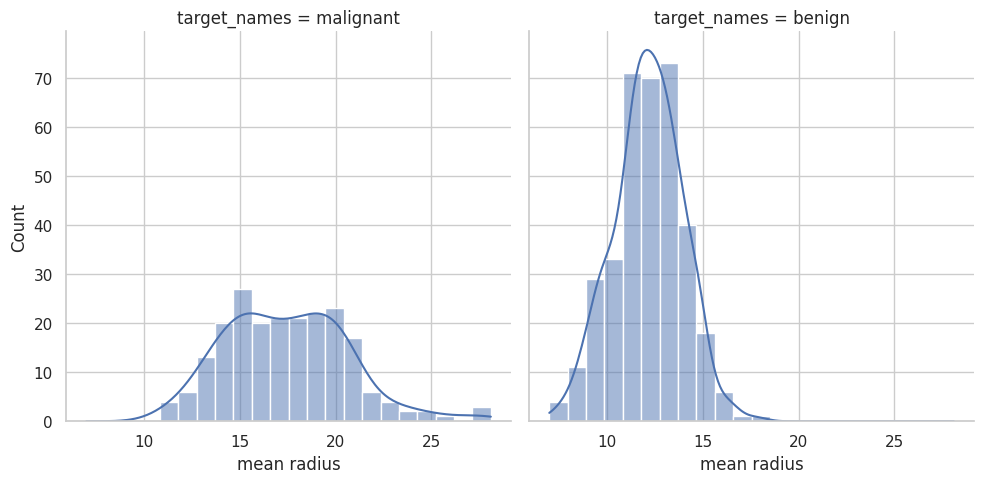

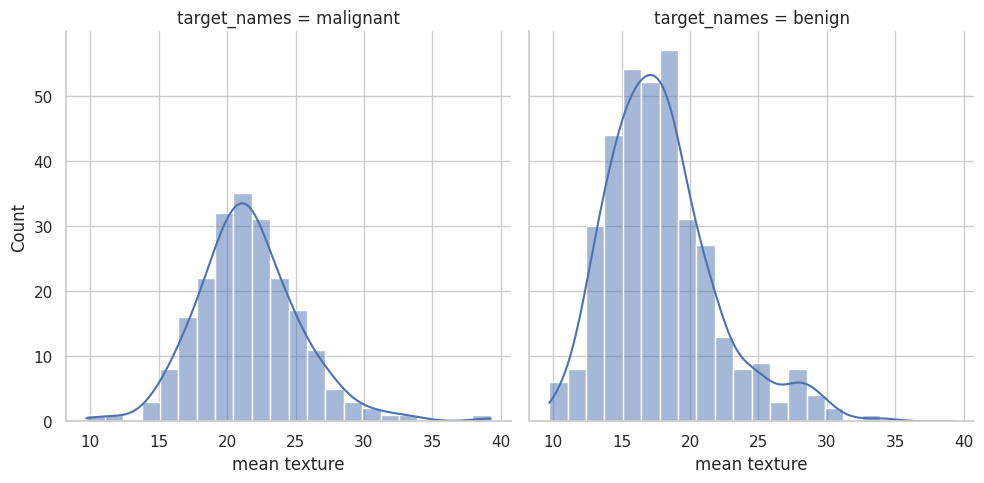

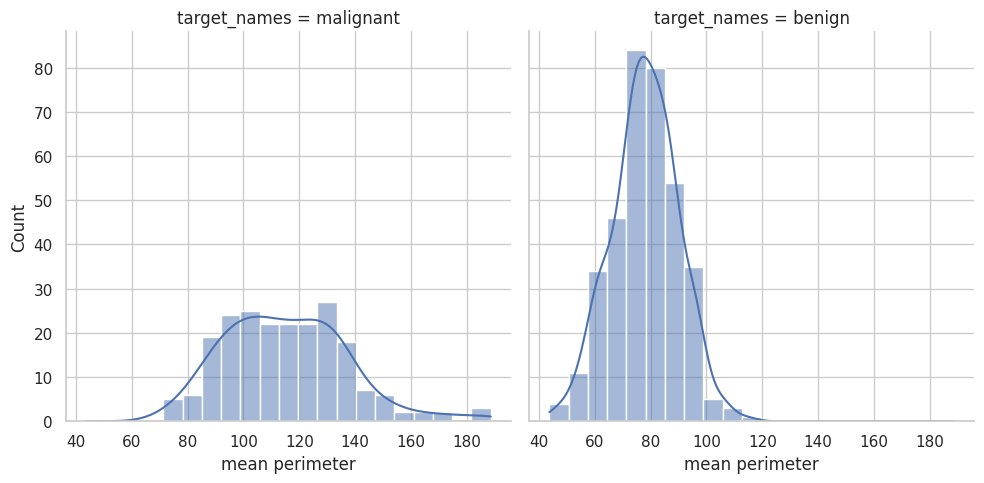

In [10]:
# Plot the distribution of variables in the dataset
# We are plotting only first three variables here
for c in df.columns[:3]:
    sns.displot(data=df, x=c, col="target_names", kde=True);

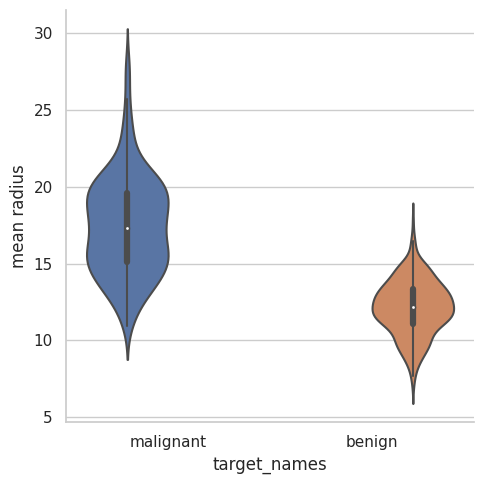

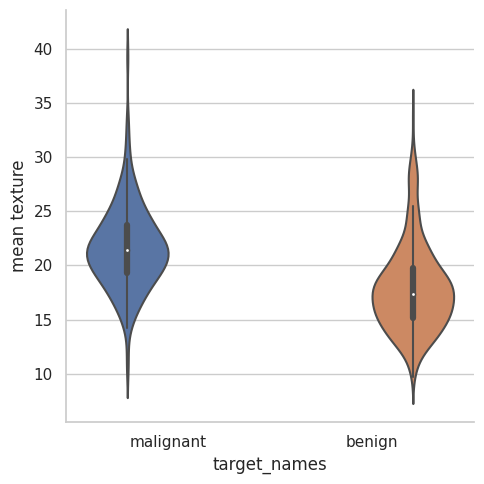

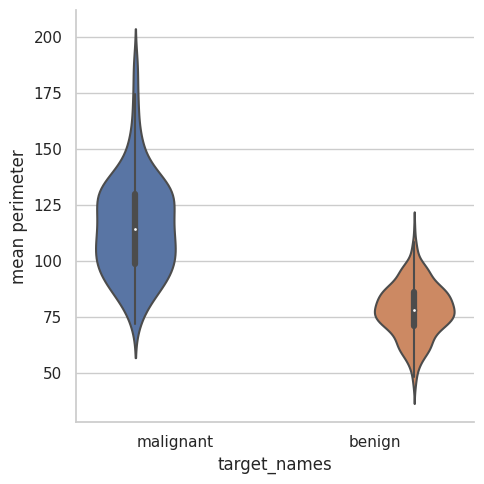

In [11]:
# Violin plot
# We are plotting only first three variables here
for c in df.columns[:3]:
    sns.catplot(data=df, kind="violin", x="target_names", y=c, hue="target_names", split=False)

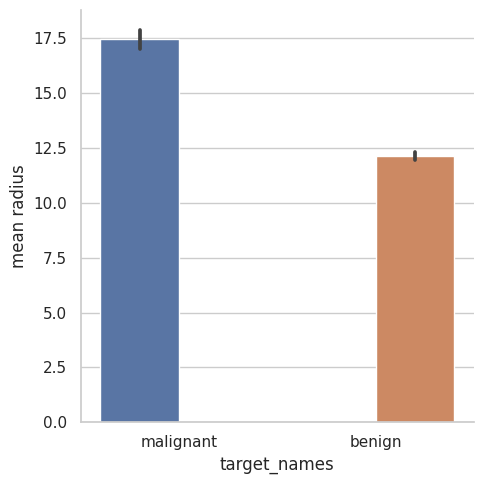

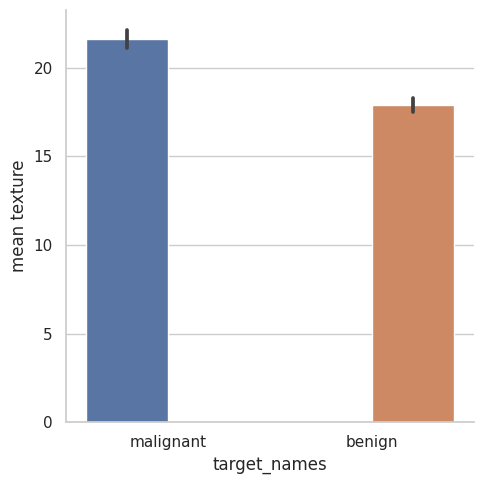

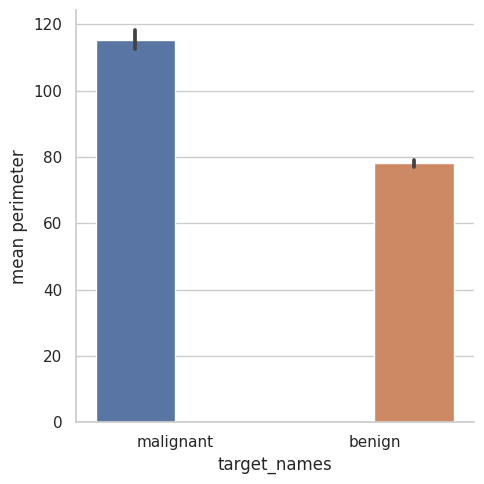

In [12]:
# Bar plot with confidence interval
# We are plotting only first three variables here
for c in df.columns[:3]:
    sns.catplot(data=df, kind="bar", x="target_names", y=c, hue="target_names");

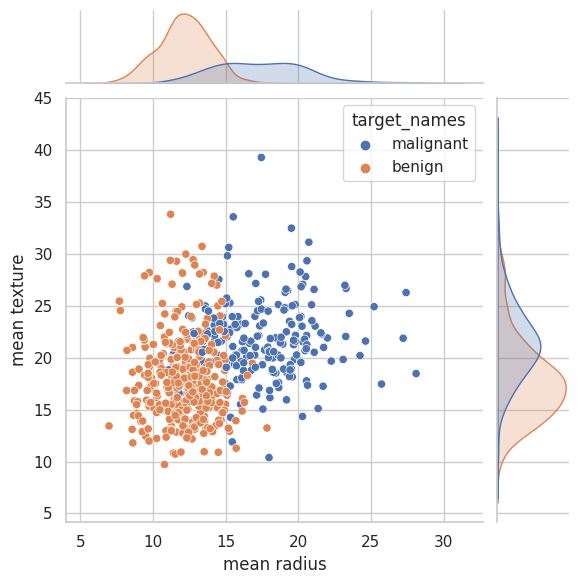

In [13]:
# Combine multiple kinds of plots to quickly give informative summaries 
sns.jointplot(data=df, x=df.columns[0], y=df.columns[1], hue="target_names");

CPU times: user 7.02 s, sys: 1.23 s, total: 8.25 s
Wall time: 6.18 s


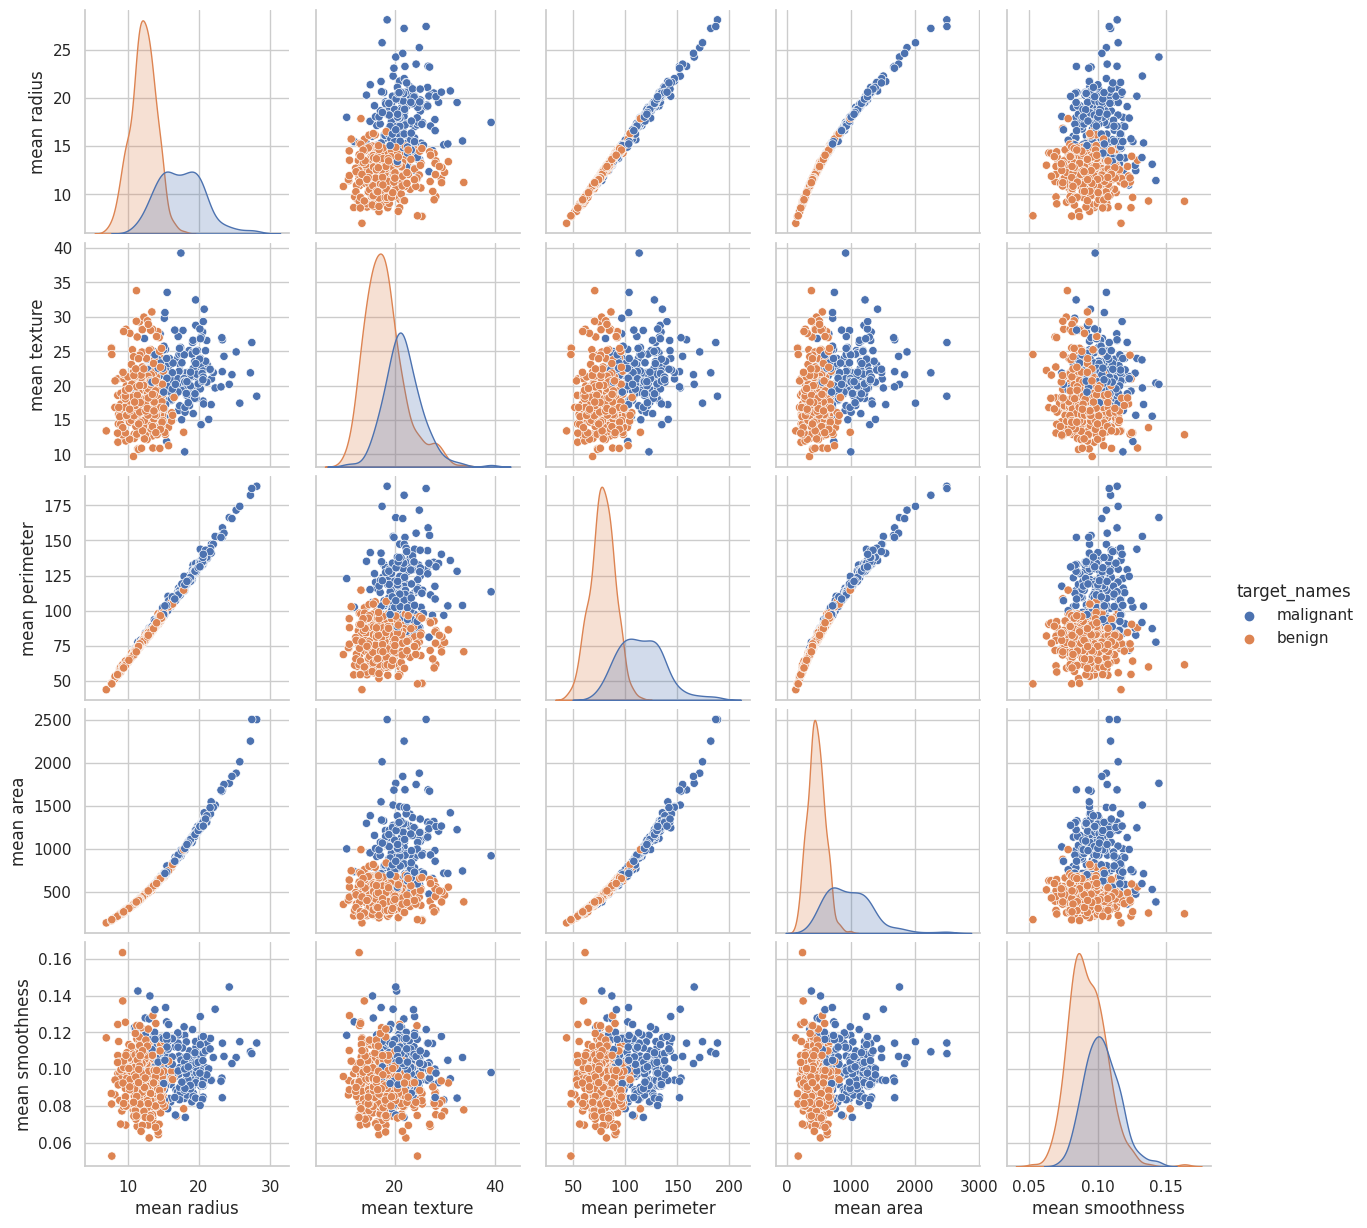

In [14]:
%%time
# Plotting only first 5 columns in the data frame
sns.pairplot(df, vars=df.columns[:5], hue='target_names', size=2.5);

### <font style="font-family:roboto;color:#455e6c"> EDA with YData Profiling </font>

Now, we will use [ydata_profiling](https://docs.profiling.ydata.ai/latest/) to automate and standardize the generation of detailed data profiling reports.

In [15]:
%%time
profile_report = ProfileReport(df, title="Profiling Report", explorative=True)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 19.8 ms


Once, the profile is complete we can save the report in to a `.html` file and share with other easily

In [ ]:
%%time
# Save profile repot as html file
profile_report.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
%%time
# Display profiling report inside the jupyter notebook through an embedded HTML report
profile_report.to_notebook_iframe()

In [ ]:
%%time
# Display profiling report inside the jupyter notebook through widgets
profile_report.to_widgets()

In [ ]:
# Comparing two data sets
train_report = ProfileReport(df_train, title="Train")
test_report = ProfileReport(df_test, title="Test")
comparison_report = train_report.compare(test_report)
comparison_report.to_file("comparison.html")

In [ ]:
# Display comparison report inside the jupyter notebook through an embedded HTML report
comparison_report.to_notebook_iframe()

### <font style="font-family:roboto;color:#455e6c"> EDA with Sweetviz </font>

Next, we will use [sweetviz](https://github.com/fbdesignpro/sweetviz) to explore our data set

Analyze a single data set

In [ ]:
# A single data set
feature_config = sv.FeatureConfig(force_num="target")
analyze_report = sv.analyze([df, "Iris"],
                            target_feat="target",
                            feat_cfg=feature_config)

In [ ]:
# Show analyze report for the single data set
analyze_report.show_notebook(layout='widescreen', w=1000, h=400, scale=0.5)

Compare two data sets

In [ ]:
# Two data sets
feature_config = sv.FeatureConfig(force_num="target")
comparison_report = sv.compare([df_train,'Train'], 
                               [df_test,'Test'], 
                               target_feat="target",
                               feat_cfg=feature_config)

In [ ]:
# Show comparison report for two data sets 
comparison_report.show_notebook(layout='widescreen', w=1000, h=400, scale=0.5)

To compare some populations within the same data set

In [ ]:
# Comparing within the same data set
feature_config = sv.FeatureConfig(force_num="target")
intra_report = sv.compare_intra(df, df["target_names"] == "setosa", 
                                ["sepal length (cm)", "petal length (cm)"], 
                                "target", feature_config)

In [ ]:
intra_report.show_notebook(w=900, h=450, scale=0.8)

### <font style="font-family:roboto;color:#455e6c"> EDA with AutoViz </font>

We will use [AutoViz](https://github.com/AutoViML/AutoViz) to generate insightful visualizations for our data

In [ ]:
av = AutoViz_Class()

In [ ]:
avt = av.AutoViz(
    "",
    sep=",",
    depVar="target_names",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=569,
    max_cols_analyzed=32,
    save_plot_dir="av"
)